In [41]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.dates as mdates

%matplotlib inline

In [2]:
df = pd.read_csv('euro-daily-hist_1999_2022.csv')

In [3]:
df.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2022-04-08,1.4552,1.9558,5.1583,1.3675,1.0155,6.9115,NaN,24.479,7.4372,...,4.9425,NaN,10.2768,1.4801,NaN,NaN,36.4880,16.0237,1.0861,15.9968
1,2022-04-07,1.4578,1.9558,5.1460,1.3704,1.0185,6.9448,NaN,24.512,7.4378,...,4.9419,NaN,10.3130,1.4848,NaN,NaN,36.5410,16.0929,1.0916,16.0520
2,2022-04-06,1.4431,1.9558,5.0996,1.3647,1.0187,6.9498,NaN,24.441,7.4378,...,4.9433,NaN,10.2855,1.4844,NaN,NaN,36.7010,16.0998,1.0923,15.9934
3,2022-04-05,1.4374,1.9558,5.0384,1.3647,1.0141,6.9783,NaN,24.338,7.4378,...,4.9438,NaN,10.2593,1.4867,NaN,NaN,36.6970,16.1500,1.0969,15.9529
4,2022-04-04,1.4651,1.9558,5.1162,1.3749,1.0203,7.0026,NaN,24.320,7.4385,...,4.9432,NaN,10.3849,1.4938,NaN,NaN,36.8940,16.1830,1.1005,16.0957


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6022 entries, 0 to 6021
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6022 non-null   object 
 1   [Australian dollar ]      6022 non-null   object 
 2   [Bulgarian lev ]          5620 non-null   object 
 3   [Brazilian real ]         5754 non-null   object 
 4   [Canadian dollar ]        6022 non-null   object 
 5   [Swiss franc ]            6022 non-null   object 
 6   [Chinese yuan renminbi ]  5754 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6022 non-null   object 
 9   [Danish krone ]           6022 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6022 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6022 non-null   object 
 14  [Croatia

Many columns are missing values. There are 40 columns, most of which were read in as 'objects,' or strings. There are many null values.

### Rename Columns, Change to Datetime

In [5]:
df.rename(columns={'[US dollar ]': 'US_dollar',
                    '[Chinese yuan renminbi ]': 'Chinese_yuan',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
df['Time'] = pd.to_datetime(df['Time'])
df.sort_values('Time', inplace=True)
df.reset_index(drop=True, inplace=True)

In [6]:
df_sect = df[['Time', 'US_dollar', 'Chinese_yuan']]

In [7]:
df_sect.tail()

,Time,US_dollar,Chinese_yuan
6017,2022-04-04,1.1005,7.0026
6018,2022-04-05,1.0969,6.9783
6019,2022-04-06,1.0923,6.9498
6020,2022-04-07,1.0916,6.9448
6021,2022-04-08,1.0861,6.9115


In [8]:
df_sect['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1268     7
1.1305     7
          ..
0.8824     1
1.3623     1
1.3683     1
1.3322     1
1.1051     1
Name: US_dollar, Length: 3595, dtype: int64

In [9]:
df_sect['Chinese_yuan'].value_counts()

-          61
7.2862      5
7.7945      4
7.3028      4
7.2722      4
           ..
10.7398     1
10.6472     1
10.6624     1
10.6660     1
6.9115      1
Name: Chinese_yuan, Length: 5051, dtype: int64

62 rows have a "Null" value that is represented by a single dash sign for US_dollar. There are 61 such columns for the Chinese yuan, too. Let's remove those rows.

In [10]:
df_sect = df_sect[(df_sect['US_dollar'] != "-") & (df_sect['Chinese_yuan'] != "-")]

In [11]:
df_sect['US_dollar'] = df_sect['US_dollar'].astype(float)
df_sect['Chinese_yuan'] = df_sect['Chinese_yuan'].astype(float)

### Plot Evolution of Euro-USD Exchange Rate

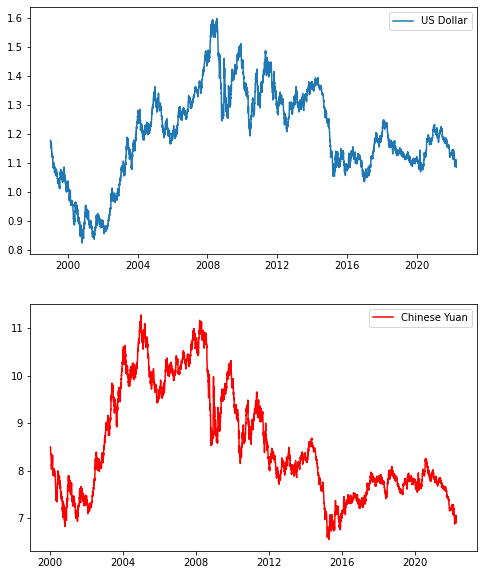

In [12]:
fig, (ax1, ax2) = plt.subplots(figsize=(8, 10), ncols=1, nrows=2)
ax1.plot(df_sect['Time'], df_sect['US_dollar'], label='US Dollar')
ax2.plot(df_sect['Time'], df_sect['Chinese_yuan'], label='Chinese Yuan', color='red')
ax1.legend()
ax2.legend()
plt.show()

This chart isn't really useful, because it shows huge fluctuations in the data since the year 2000 or so. We're interested in plotting and understanding how euro conversion rates changed for the U.S. dollar and the Chinese Yuan during the COVID-19 pandemic, specifically.

#### Compute Rolling Means

In [13]:
df_sect['rolling_30_mean_dollar'] = df_sect['US_dollar'].rolling(30).mean()
df_sect['rolling_30_mean_yuan'] = df_sect['Chinese_yuan'].rolling(30).mean()

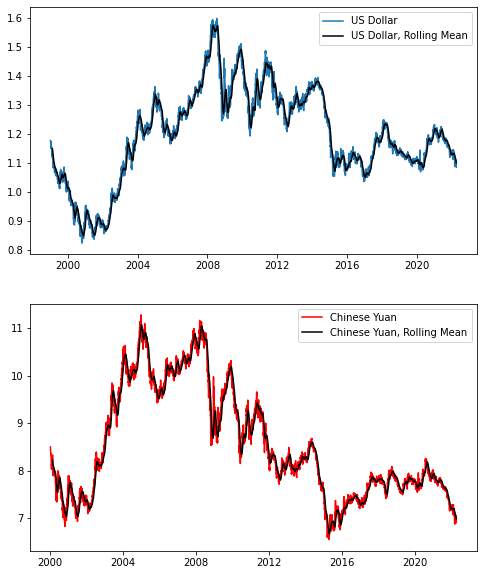

In [14]:
fig, (ax1, ax2) = plt.subplots(figsize=(8, 10), ncols=1, nrows=2)
ax1.plot(df_sect['Time'], df_sect['US_dollar'], label='US Dollar')
ax1.plot(df_sect['Time'], df_sect['rolling_30_mean_dollar'], label='US Dollar, Rolling Mean', color='black')

ax2.plot(df_sect['Time'], df_sect['Chinese_yuan'], label='Chinese Yuan', color='red')
ax2.plot(df_sect['Time'], df_sect['rolling_30_mean_yuan'], label='Chinese Yuan, Rolling Mean', color='black')
ax1.legend()
ax2.legend()
plt.show()

### Chart Idea

I will build a chart that has two subplots. The top row will be US data for the start of 2020 to present. The bottom row will be Chinese data for the same time range.

I'll focus on titles, beautiful spacing and so forth to make the chart look nice.

In [15]:
plt.style.use('fivethirtyeight')

In [16]:
df_sect.head()

,Time,US_dollar,Chinese_yuan,rolling_30_mean_dollar,rolling_30_mean_yuan
0,1999-01-04,1.1789,NaN,NaN,NaN
1,1999-01-05,1.1790,NaN,NaN,NaN
2,1999-01-06,1.1743,NaN,NaN,NaN
3,1999-01-07,1.1632,NaN,NaN,NaN
4,1999-01-08,1.1659,NaN,NaN,NaN


In [17]:
df_sect_covid = df_sect[df_sect['Time'].dt.year >= 2020]
df_sect_covid.head()

,Time,US_dollar,Chinese_yuan,rolling_30_mean_dollar,rolling_30_mean_yuan
5437,2020-01-02,1.1193,7.7946,1.109237,7.785953
5438,2020-01-03,1.1147,7.7712,1.109470,7.785563
5439,2020-01-06,1.1194,7.8049,1.109920,7.786440
5440,2020-01-07,1.1172,7.7562,1.110190,7.785203
5441,2020-01-08,1.1115,7.7184,1.110380,7.783037


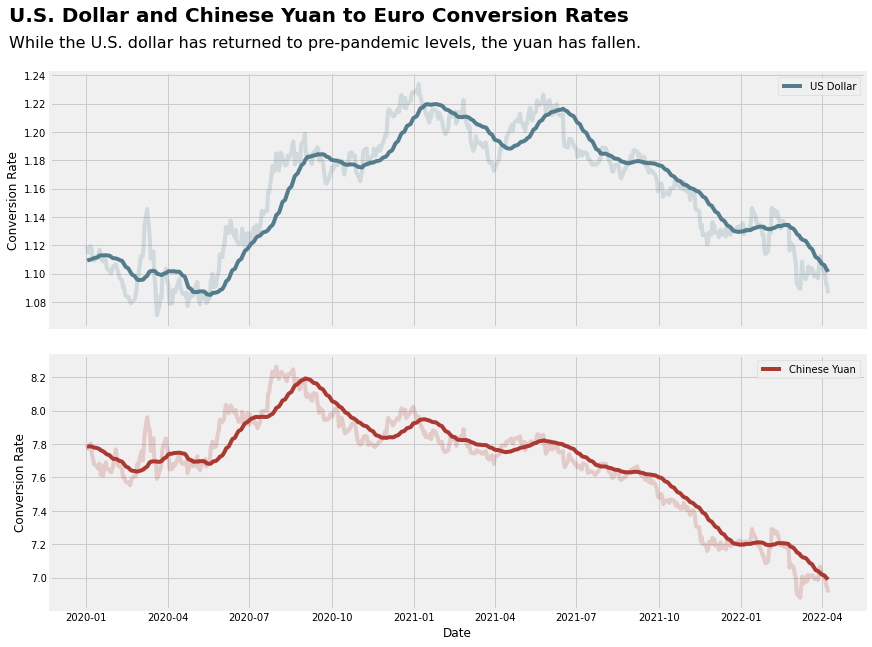

In [50]:
fig, (ax1, ax2) = plt.subplots(figsize=(12, 8), ncols=1, nrows=2, sharey=False)
fig.tight_layout()

ax1.plot(df_sect_covid['Time'], df_sect_covid['US_dollar'], color='#537d8d', alpha=0.2)
ax1.plot(df_sect_covid['Time'], df_sect_covid['rolling_30_mean_dollar'], color='#537d8d', label='US Dollar')

ax2.plot(df_sect_covid['Time'], df_sect_covid['Chinese_yuan'], color='#ac3931', alpha=0.2)
ax2.plot(df_sect_covid['Time'], df_sect_covid['rolling_30_mean_yuan'], color='#ac3931', label='Chinese Yuan')

ax1.set_xticklabels([])

# Add Title and Subtitle
ax1.text(-0.05, 1.2, 'U.S. Dollar and Chinese Yuan to Euro Conversion Rates', transform=ax1.transAxes, weight='bold', size=20)
ax1.text(-0.05, 1.1, 'While the U.S. dollar has returned to pre-pandemic levels, the yuan has fallen.', transform=ax1.transAxes, size=16)
ax2.set_xlabel('Date')
ax1.set_ylabel('Conversion Rate')
ax2.set_ylabel('Conversion Rate')

ax1.legend()
ax2.legend()
plt.show()